In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display


from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('C:/Users/thera/Desktop/Assignments/Math/walmart_cleaned (version 1) (1).csv')
df.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,2/5/2010,0,1,24924.50,42.31,2.572,211.096358,8.106,151315
1,1,2/5/2010,0,26,11737.12,42.31,2.572,211.096358,8.106,151315
2,1,2/5/2010,0,17,13223.76,42.31,2.572,211.096358,8.106,151315
3,1,2/5/2010,0,45,37.44,42.31,2.572,211.096358,8.106,151315
4,1,2/5/2010,0,28,1085.29,42.31,2.572,211.096358,8.106,151315


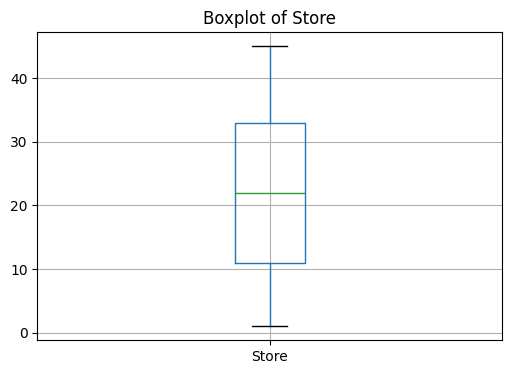

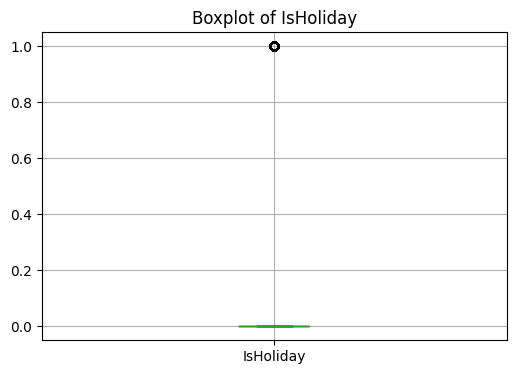

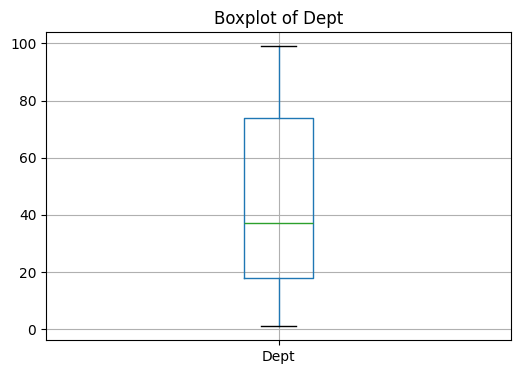

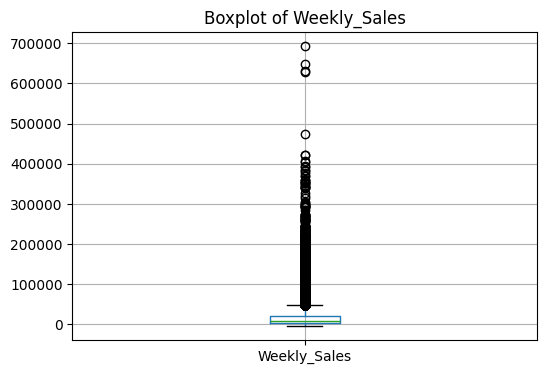

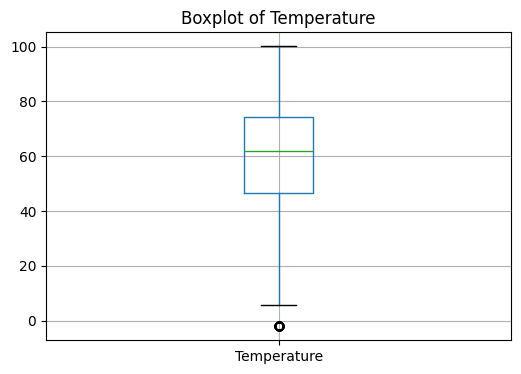

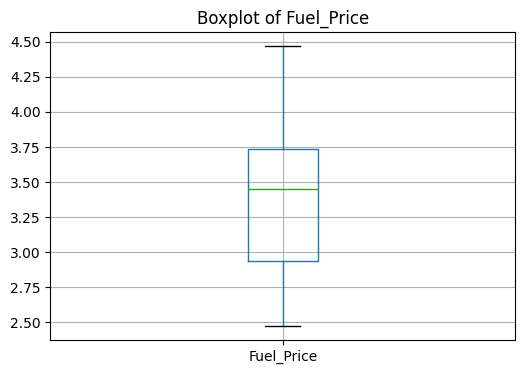

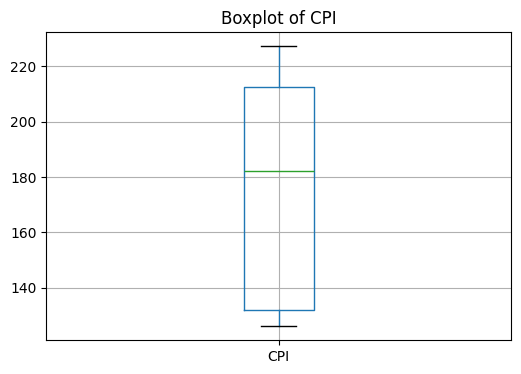

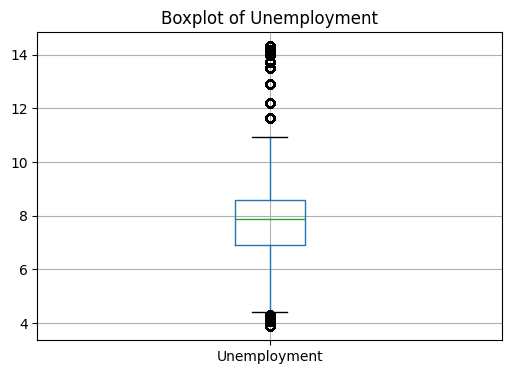

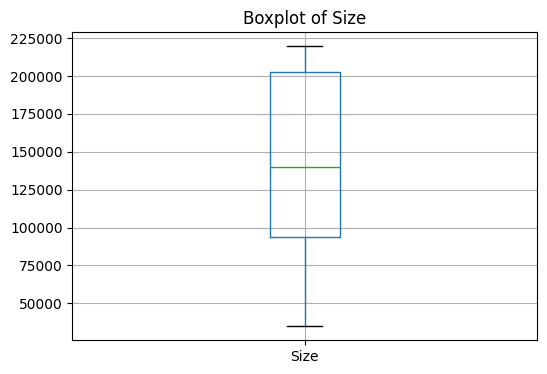

In [174]:
# Check for outliers using boxplots
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()






In [7]:
# Display the first few rows of the dataset
print(df.head())

# Get an overview of the columns and their data types
print(df.info())

# Summary statistics of numerical columns
print(df.describe())


   Store      Date  IsHoliday  Dept  Weekly_Sales  Temperature  Fuel_Price  \
0      1  2/5/2010          0     1      24924.50        42.31       2.572   
1      1  2/5/2010          0    26      11737.12        42.31       2.572   
2      1  2/5/2010          0    17      13223.76        42.31       2.572   
3      1  2/5/2010          0    45         37.44        42.31       2.572   
4      1  2/5/2010          0    28       1085.29        42.31       2.572   

          CPI  Unemployment    Size  
0  211.096358         8.106  151315  
1  211.096358         8.106  151315  
2  211.096358         8.106  151315  
3  211.096358         8.106  151315  
4  211.096358         8.106  151315  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   IsHoliday  

In [76]:
# Count of distinct values in each column
distinct_counts = df.nunique()
print("\nCount of Distinct Values in Each Column:")
print(distinct_counts)


Count of Distinct Values in Each Column:
Store               45
Date               143
IsHoliday            2
Dept                81
Weekly_Sales    359464
Temperature       3528
Fuel_Price         892
CPI               2145
Unemployment       349
Size                40
dtype: int64


In [8]:
# Count of unique stores
print(df['Store'].nunique())

# Distribution of stores
print(df['Store'].value_counts())


45
Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64


In [9]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year information
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Check the distribution of months and years
print(df['Month'].value_counts())
print(df['Year'].value_counts())


Month
4     41332
7     40980
3     38451
10    38362
9     38339
8     38169
6     38137
2     35526
5     35314
12    29802
11    23613
1     23545
Name: count, dtype: int64
Year
2011    153453
2010    140679
2012    127438
Name: count, dtype: int64


In [10]:
# Count of unique departments
print(df['Dept'].nunique())

# Distribution of departments
print(df['Dept'].value_counts())


81
Dept
1     6435
82    6435
46    6435
90    6435
14    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: count, Length: 81, dtype: int64


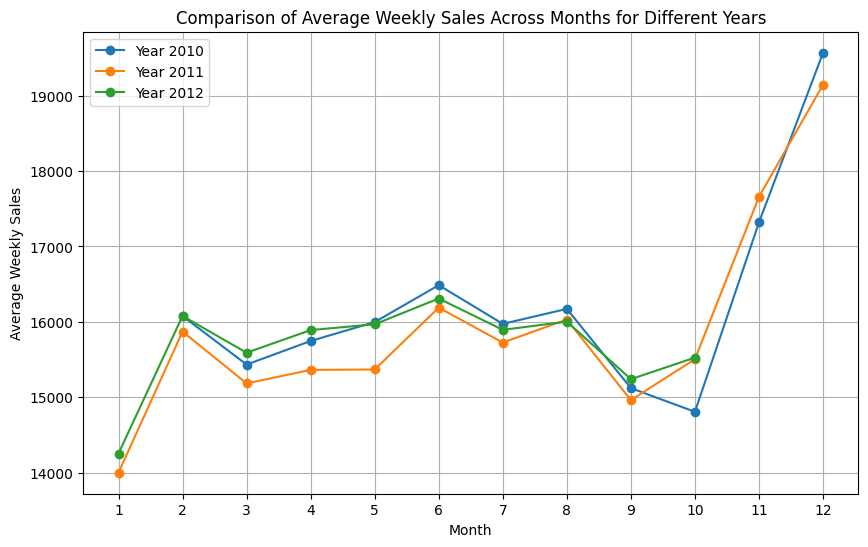

In [78]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group data by year and month, calculating the mean of Weekly_Sales
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Plotting average weekly sales for each year
unique_years = monthly_sales['Year'].unique()

plt.figure(figsize=(10, 6))

for year in unique_years:
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['Weekly_Sales'], marker='o', label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Comparison of Average Weekly Sales Across Months for Different Years')
plt.xticks(range(1, 13))  # Set x-axis ticks for each month
plt.legend()
plt.grid(True)
plt.show()


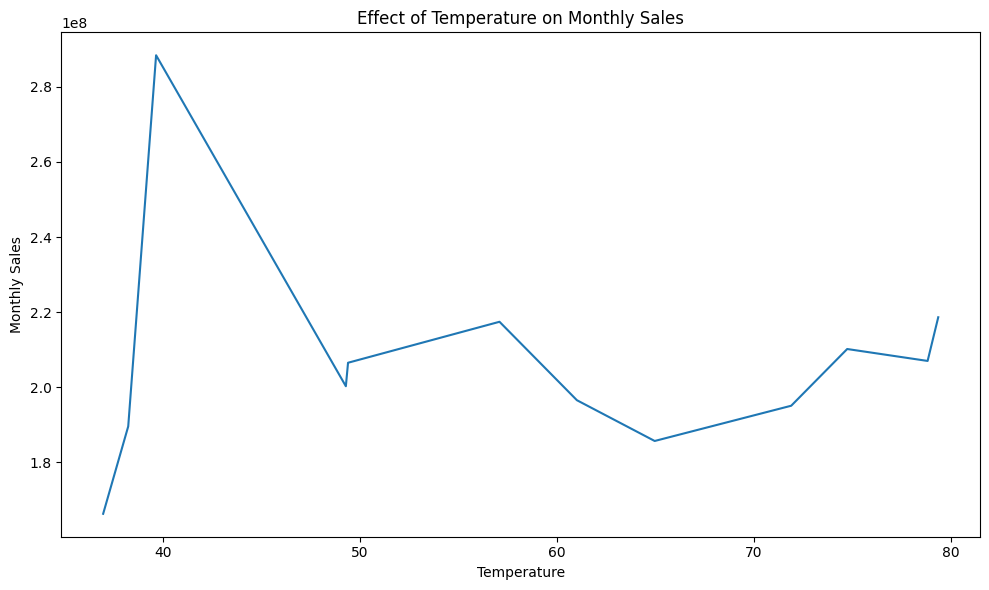

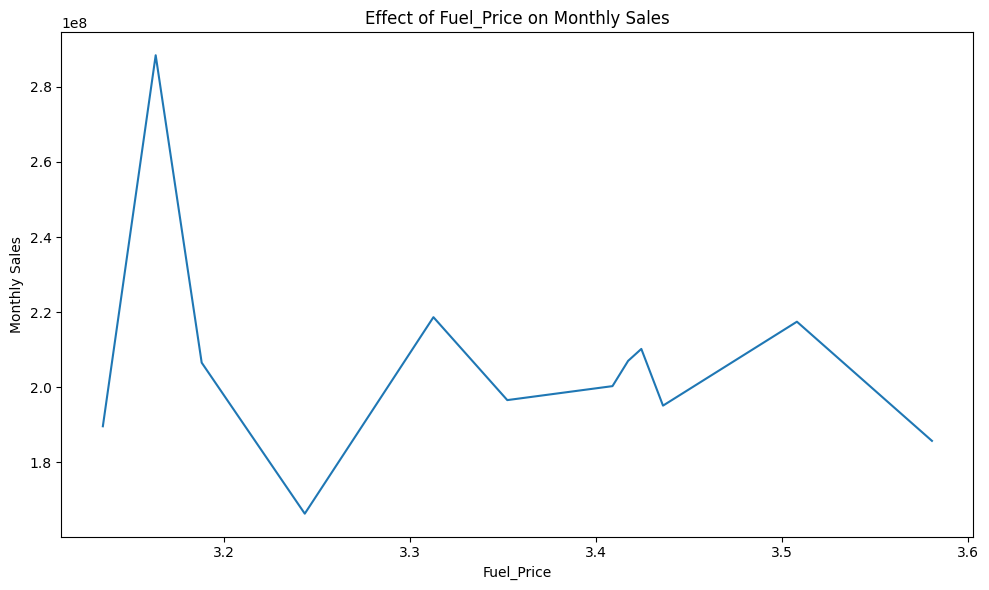

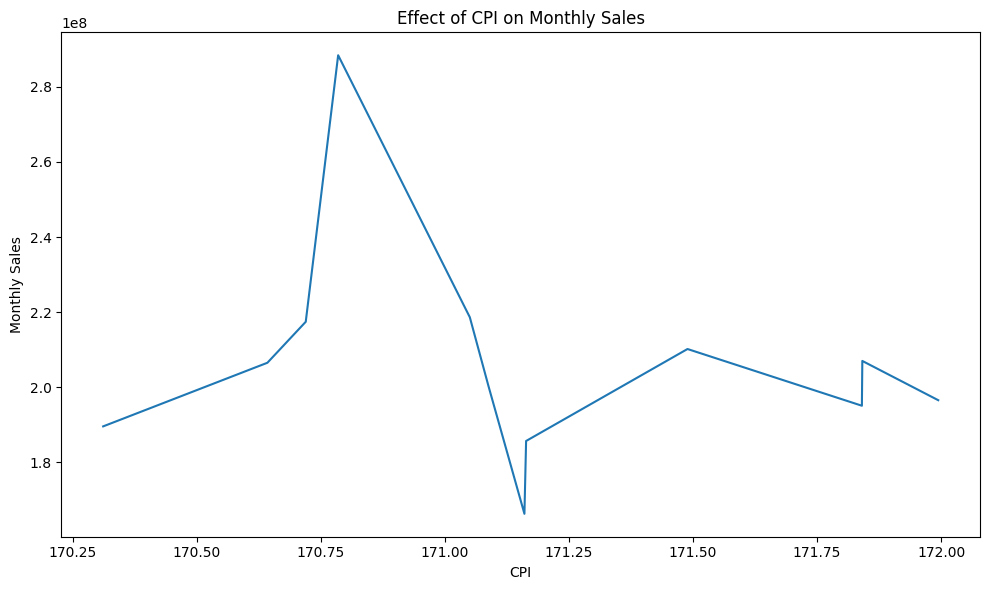

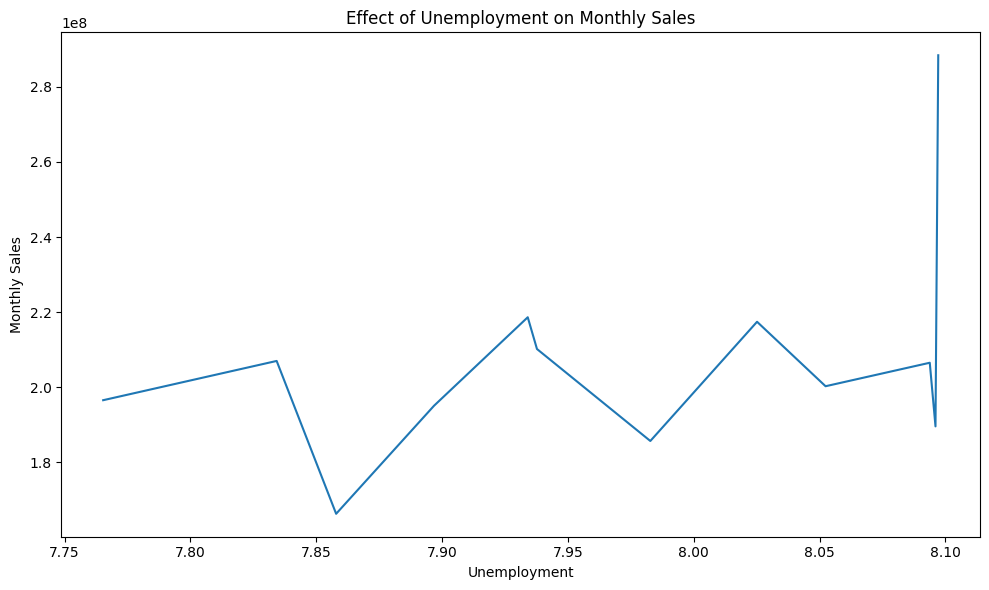

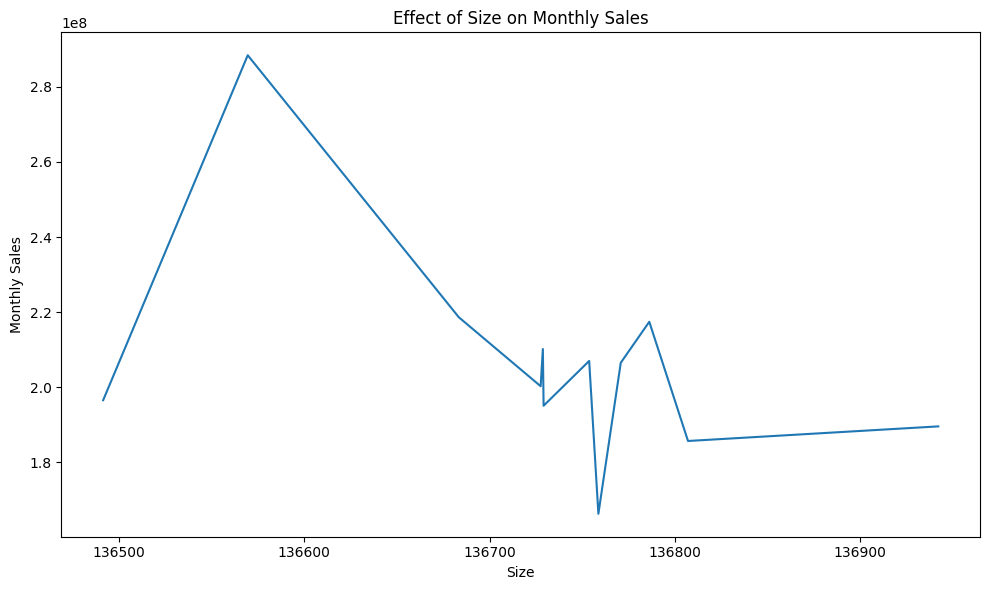

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Create a new 'Year' and 'Month' column from the index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Group data by Year and Month, aggregating sales by sum for each month
df['Monthly_Sales'] = df.groupby(['Year', 'Month'])['Weekly_Sales'].transform('sum')

# Adding other factors like Temperature, Fuel_Price, CPI, Unemployment, and Size
factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

#in this we have not taken holidays as factor, refer last two codes and output for analysis of that
for factor in factors:
    factor_mean = df.groupby(['Month'])[factor].mean()
    monthly_sales = df.groupby(['Month'])['Monthly_Sales'].mean()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=factor_mean, y=monthly_sales)
    plt.xlabel(factor)
    plt.ylabel('Monthly Sales')
    plt.title(f'Effect of {factor} on Monthly Sales')
    plt.tight_layout()
    plt.show()


In [13]:
# Calculate odds ratio for high sales during holidays vs. non-holidays
from scipy.stats import chi2_contingency

# Creating a contingency table
holiday_sales = df[df['IsHoliday'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == 0]['Weekly_Sales']
high_sales_threshold = 10000  # Define a threshold for high sales
holiday_high_sales = (holiday_sales > high_sales_threshold).sum()
non_holiday_high_sales = (non_holiday_sales > high_sales_threshold).sum()

contingency_table = [[holiday_high_sales, len(holiday_sales) - holiday_high_sales],
                     [non_holiday_high_sales, len(non_holiday_sales) - non_holiday_high_sales]]

# Perform chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 25.428304412139436, p-value: 4.5913206405155453e-07


In [14]:
# Perform t-test between two different departments
from scipy.stats import ttest_ind

dept_1_sales = df[df['Dept'] == 1]['Weekly_Sales']
dept_2_sales = df[df['Dept'] == 2]['Weekly_Sales']

t_stat, p_val = ttest_ind(dept_1_sales, dept_2_sales)
print(f"T-Statistic: {t_stat}, p-value: {p_val}")


T-Statistic: -66.65117072232226, p-value: 0.0


In [15]:
# Perform one-way ANOVA test for multiple store comparison
from scipy.stats import f_oneway

store_sales = []

for store_id in df['Store'].unique():
    store_sales.append(df[df['Store'] == store_id]['Weekly_Sales'])

f_stat, p_value = f_oneway(*store_sales)
print(f"F-Statistic: {f_stat}, p-value: {p_value}")


F-Statistic: 984.7066594796792, p-value: 0.0


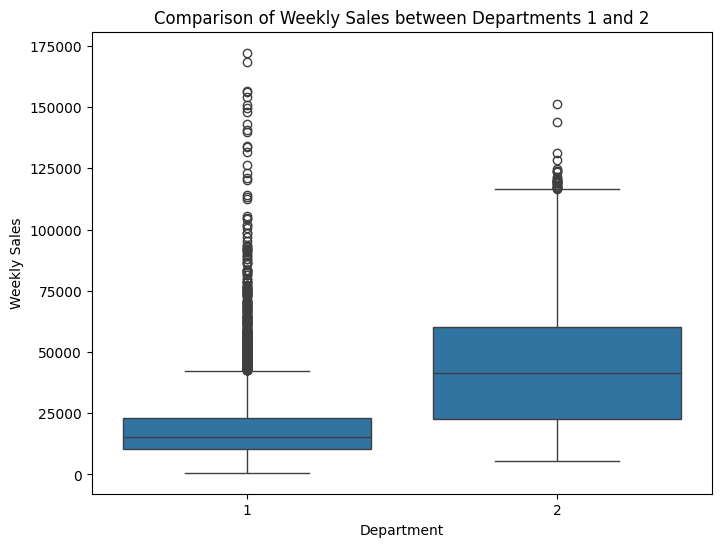

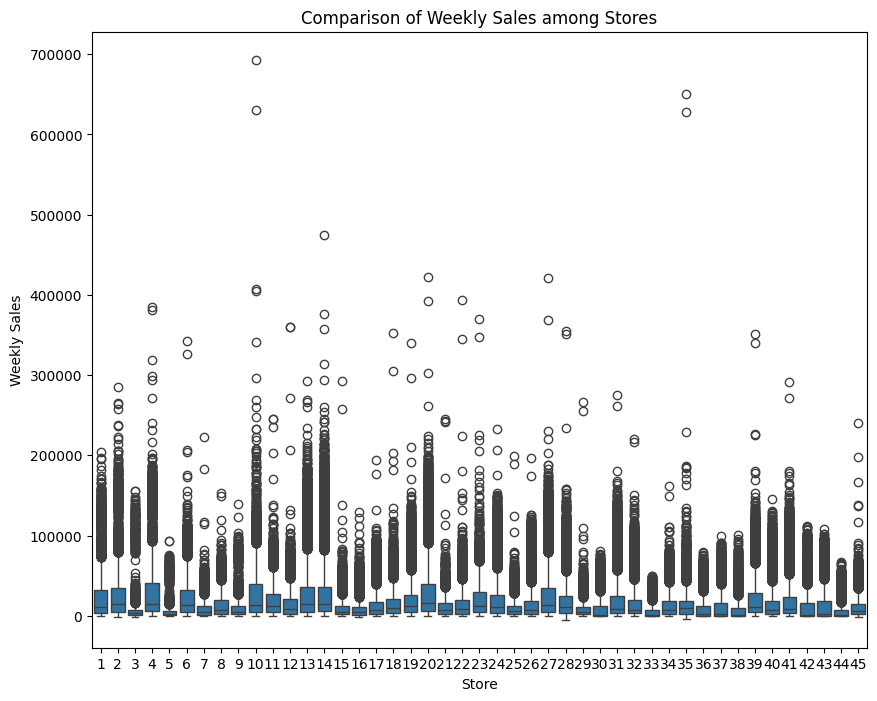

In [16]:
# Visualizing differences in sales between two departments (T-test)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dept', y='Weekly_Sales', data=df[df['Dept'].isin([1, 2])])
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Weekly Sales between Departments 1 and 2')
plt.show()

# Visualizing differences in sales among stores (ANOVA)
plt.figure(figsize=(10, 8))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Weekly Sales among Stores')
plt.show()


In [17]:
import statsmodels.api as sm

# Define independent variables and dependent variable
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          6.51e-153
Time:                        19:25:10   Log-Likelihood:            -4.8264e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421565   BIC:                         9.653e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.387e+04    398.873     59.844   

In [167]:
df = pd.read_csv('C:/Users/thera/Desktop/Assignments/Math/walmart_cleaned (version 1) (1).csv')
df.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,2/5/2010,0,1,24924.50,42.31,2.572,211.096358,8.106,151315
1,1,2/5/2010,0,26,11737.12,42.31,2.572,211.096358,8.106,151315
2,1,2/5/2010,0,17,13223.76,42.31,2.572,211.096358,8.106,151315
3,1,2/5/2010,0,45,37.44,42.31,2.572,211.096358,8.106,151315
4,1,2/5/2010,0,28,1085.29,42.31,2.572,211.096358,8.106,151315


In [168]:
print(df.columns)

Index(['Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Size'],
      dtype='object')


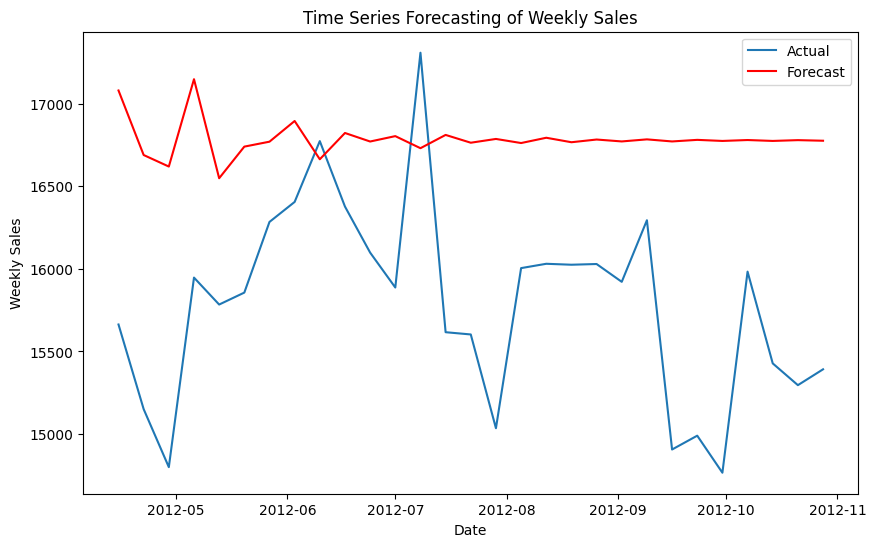

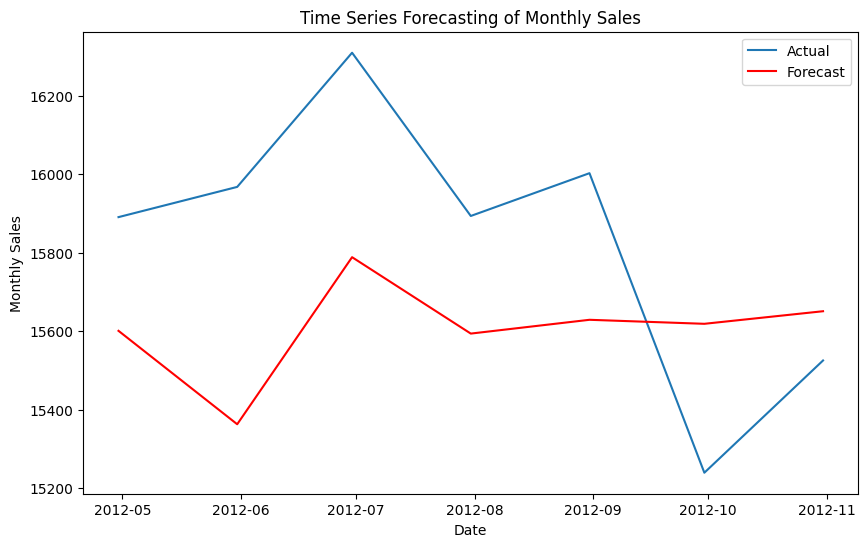

In [73]:
# Fit ARIMA model for both weekly and monthly data
model_arima_weekly = ARIMA(train_weekly, order=(5, 1, 0))
model_arima_monthly = ARIMA(train_monthly, order=(5, 1, 0))

arima_model_weekly = model_arima_weekly.fit()
arima_model_monthly = model_arima_monthly.fit()

# Forecast for both weekly and monthly data
forecast_weekly = arima_model_weekly.forecast(steps=len(test_weekly))  # Forecast length matches test_weekly
forecast_monthly = arima_model_monthly.forecast(steps=len(test_monthly))  # Forecast length matches test_monthly

# Visualize the forecast for weekly data
plt.figure(figsize=(10, 6))
plt.plot(test_weekly.index, test_weekly.values, label='Actual')
plt.plot(test_weekly.index, forecast_weekly, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Time Series Forecasting of Weekly Sales')
plt.legend()
plt.show()

# Visualize the forecast for monthly data
plt.figure(figsize=(10, 6))
plt.plot(test_monthly.index, test_monthly.values, label='Actual')
plt.plot(test_monthly.index, forecast_monthly, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Time Series Forecasting of Monthly Sales')
plt.legend()
plt.show()


In [172]:
import statsmodels.api as sm

# Define independent variables and dependent variable
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          6.51e-153
Time:                        23:32:45   Log-Likelihood:            -4.8264e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421565   BIC:                         9.653e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.387e+04    398.873     59.844   

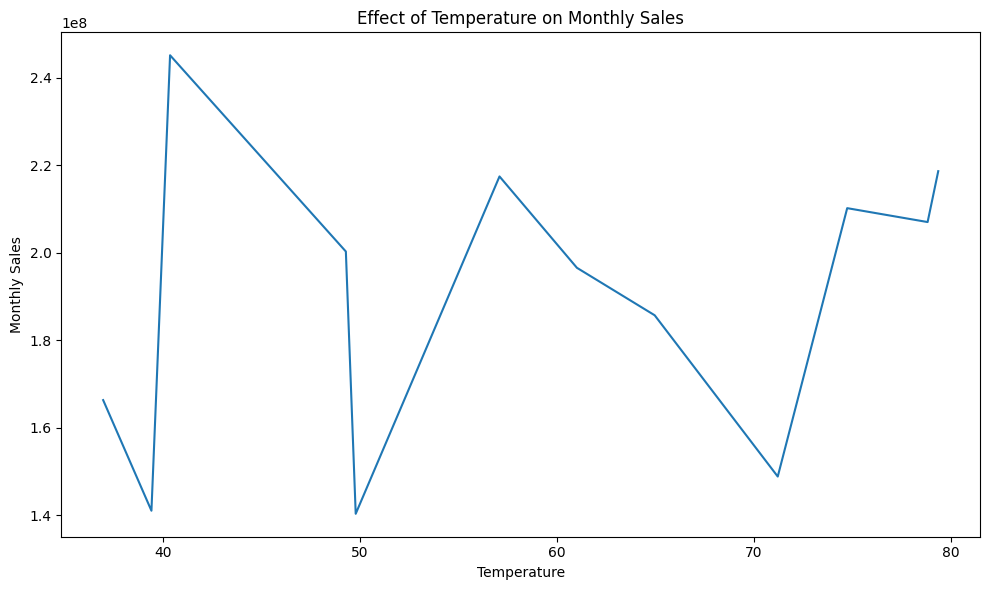

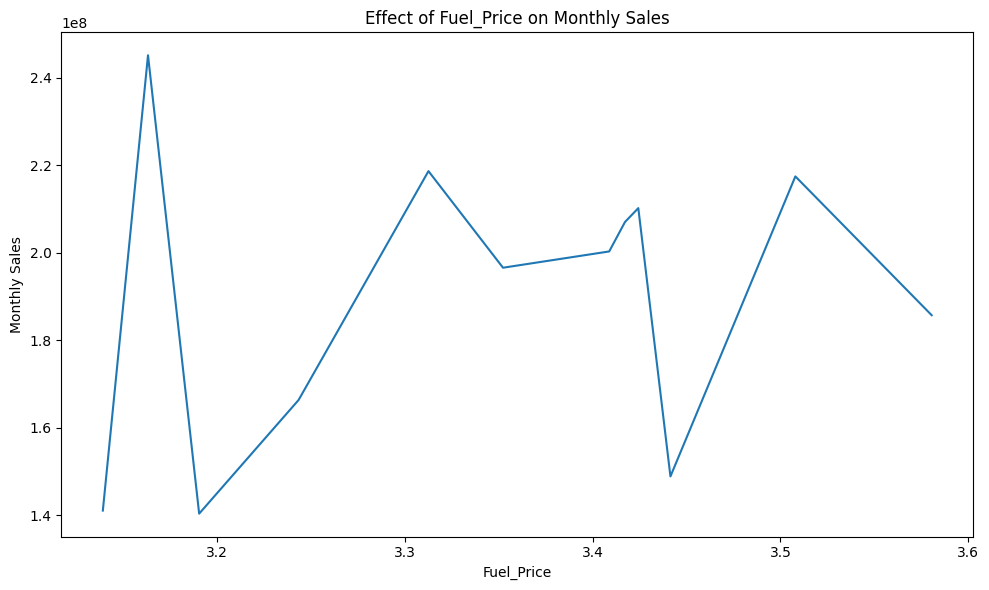

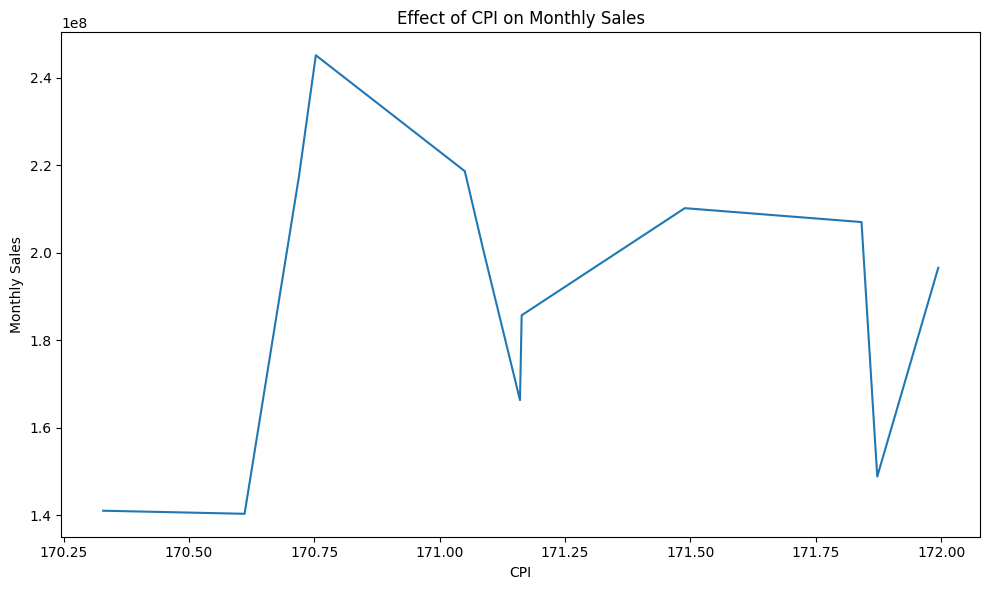

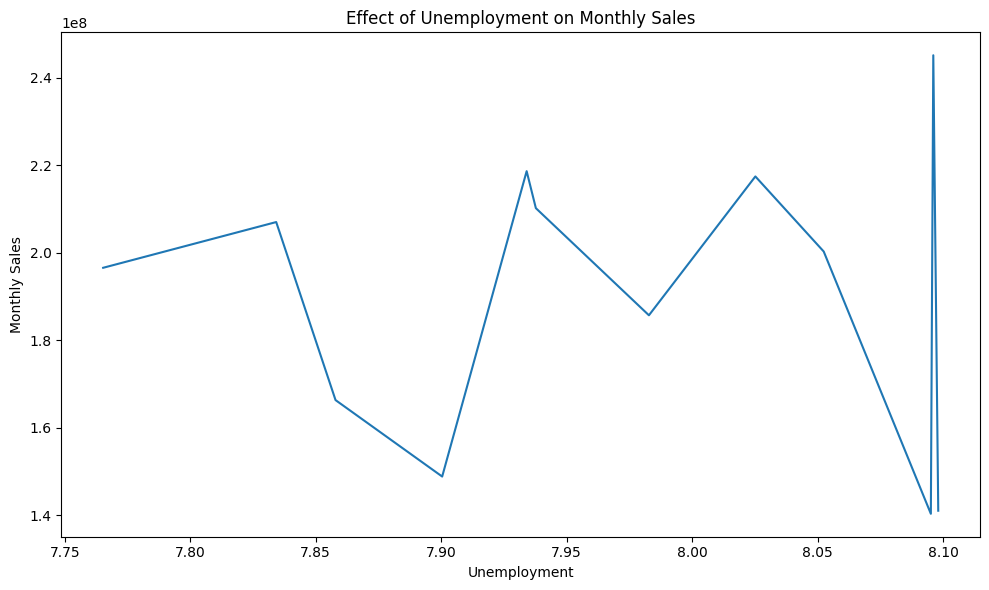

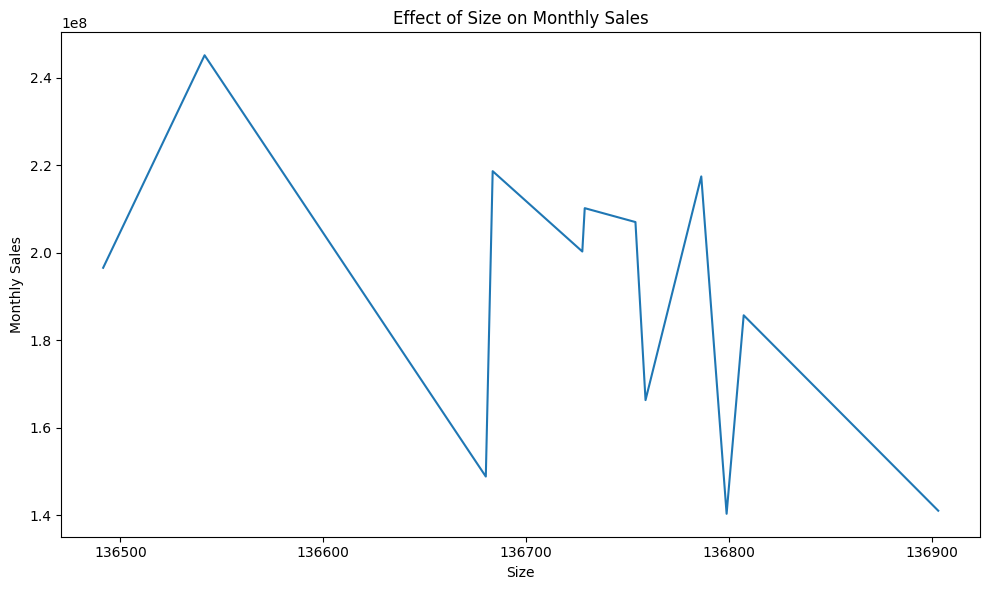

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Create a new 'Year' and 'Month' column from the index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Exclude holidays
df = df[df['IsHoliday'] == 0]

# Group data by Year and Month, aggregating sales by sum for each month
df['Monthly_Sales'] = df.groupby(['Year', 'Month'])['Weekly_Sales'].transform('sum')

# Adding other factors like Temperature, Fuel_Price, CPI, Unemployment, and Size
factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

# Plotting the effect of factors on monthly sales
for factor in factors:
    # Create a new DataFrame for each factor
    df_factor = df.groupby(['Month']).agg({factor: 'mean', 'Monthly_Sales': 'mean'}).reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=factor, y='Monthly_Sales', data=df_factor)
    plt.xlabel(factor)
    plt.ylabel('Monthly Sales')
    plt.title(f'Effect of {factor} on Monthly Sales')
    plt.tight_layout()
    plt.show()


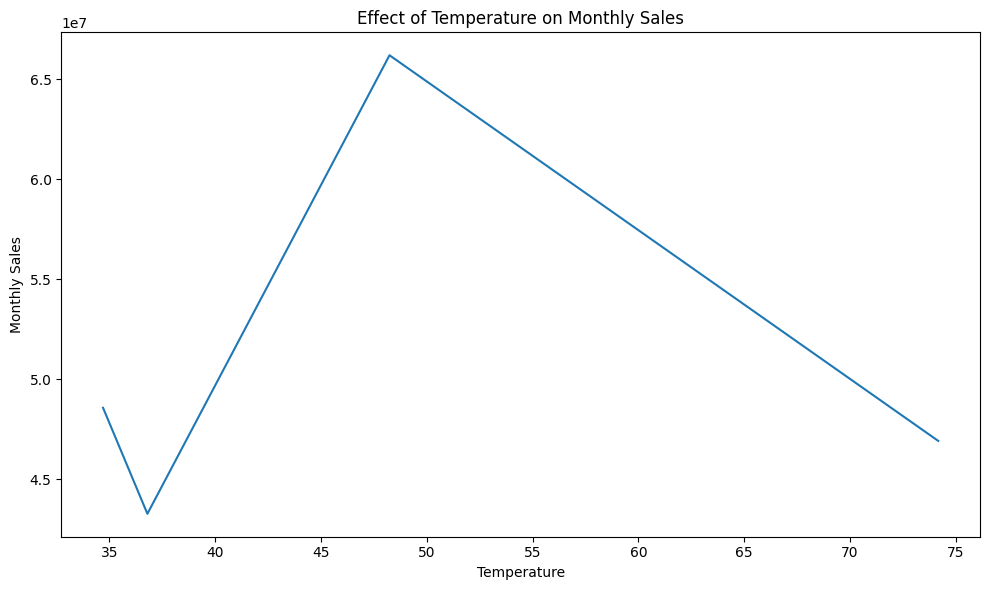

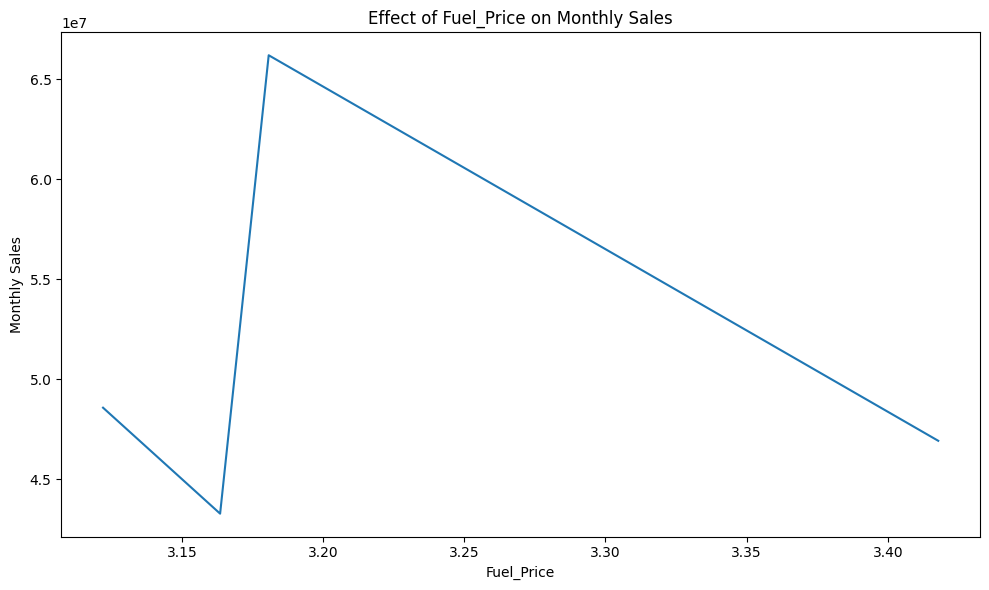

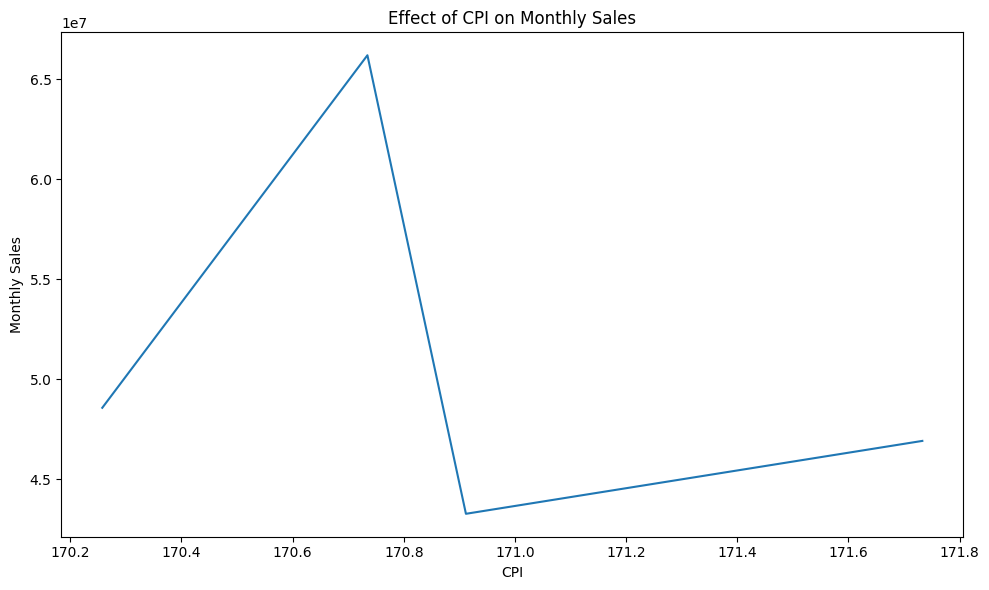

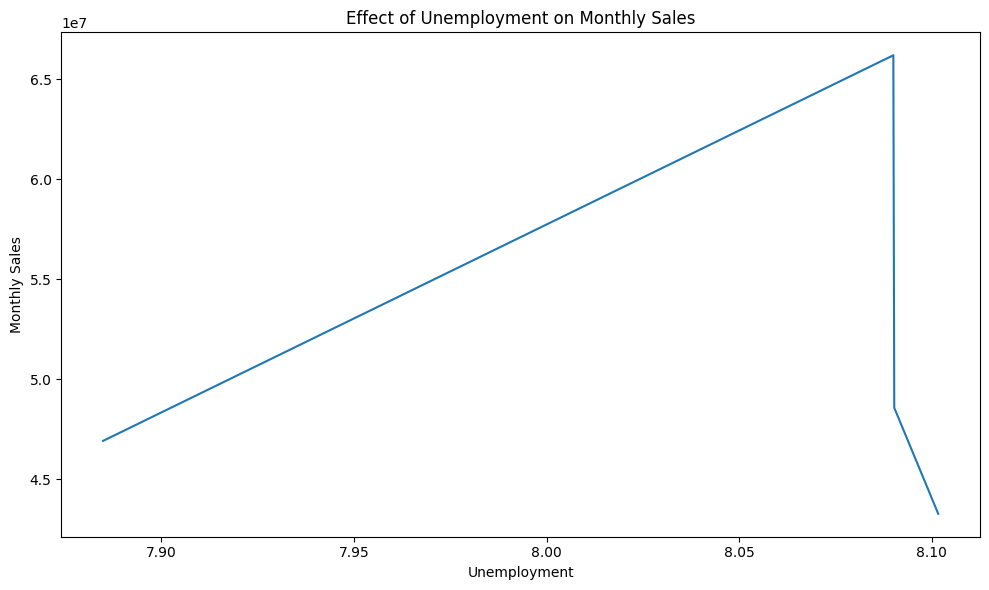

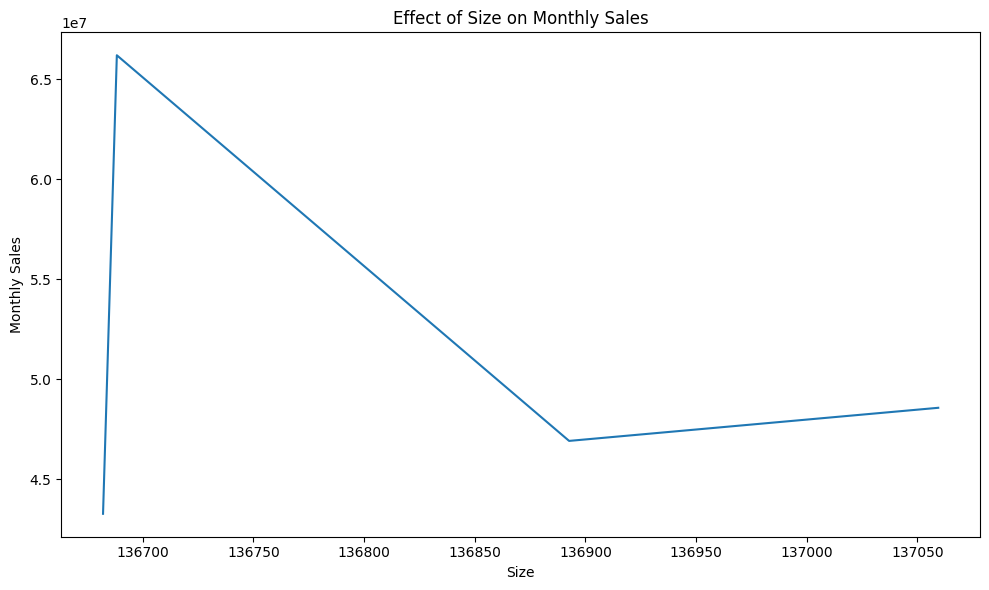

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Create a new 'Year' and 'Month' column from the index
df['Year'] = df.index.year
df['Month'] = df.index.month

# include holidays
df = df[df['IsHoliday'] == 1]

# Group data by Year and Month, aggregating sales by sum for each month
df['Monthly_Sales'] = df.groupby(['Year', 'Month'])['Weekly_Sales'].transform('sum')

# Adding other factors like Temperature, Fuel_Price, CPI, Unemployment, and Size
factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

# Plotting the effect of factors on monthly sales
for factor in factors:
    # Create a new DataFrame for each factor
    df_factor = df.groupby(['Month']).agg({factor: 'mean', 'Monthly_Sales': 'mean'}).reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=factor, y='Monthly_Sales', data=df_factor)
    plt.xlabel(factor)
    plt.ylabel('Monthly Sales')
    plt.title(f'Effect of {factor} on Monthly Sales')
    plt.tight_layout()
    plt.show()


In [169]:
from scipy.stats import pearsonr

# Summary statistics of numerical columns
weekly_sales_stats = df['Weekly_Sales'].describe()
temperature_stats = df['Temperature'].describe()

print("Weekly Sales Summary Statistics:")
print(weekly_sales_stats)

print("\nTemperature Summary Statistics:")
print(temperature_stats)


if len(df['CPI']) >= 2 and len(df['Weekly_Sales']) >= 2:
    corr, p_value = pearsonr(df['CPI'], df['Weekly_Sales'])
    print(f"\nPearson correlation: {corr}, p-value: {p_value}")
else:
    print("Both 'CPI' and 'Weekly_Sales' should have at least two data points for correlation calculation.")


Weekly Sales Summary Statistics:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Temperature Summary Statistics:
count    421570.000000
mean         60.090059
std          18.447931
min          -2.060000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

Pearson correlation: -0.020921335318818728, p-value: 4.8925869261908954e-42


In [170]:
from scipy.stats import pearsonr

# Exclude holidays
df_excluded_holidays = df[df['IsHoliday'] == 0]

# Summary statistics of numerical columns
weekly_sales_stats = df_excluded_holidays['Weekly_Sales'].describe()
temperature_stats = df_excluded_holidays['Temperature'].describe()

print("Weekly Sales Summary Statistics:")
print(weekly_sales_stats)

print("\nTemperature Summary Statistics:")
print(temperature_stats)


if len(df_excluded_holidays['CPI']) >= 2 and len(df_excluded_holidays['Weekly_Sales']) >= 2:
    corr, p_value = pearsonr(df_excluded_holidays['CPI'], df_excluded_holidays['Weekly_Sales'])
    print(f"\nPearson correlation: {corr}, p-value: {p_value}")
else:
    print("Both 'CPI' and 'Weekly_Sales' should have at least two data points for correlation calculation.")


Weekly Sales Summary Statistics:
count    391909.000000
mean      15901.445069
std       22330.747450
min       -4988.940000
25%        2079.750000
50%        7589.950000
75%       20131.210000
max      406988.630000
Name: Weekly_Sales, dtype: float64

Temperature Summary Statistics:
count    391909.000000
mean         60.881518
std          18.077993
min          -2.060000
25%          48.100000
50%          62.940000
75%          74.730000
max         100.140000
Name: Temperature, dtype: float64

Pearson correlation: -0.020745945191683764, p-value: 1.4151039540202303e-38


In [171]:
from scipy.stats import pearsonr

factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Exclude holidays from the DataFrame
df_excluded_holidays = df[df['IsHoliday'] == 0]

for factor in factors:
   
    corr, p_value = pearsonr(df_excluded_holidays[factor], df_excluded_holidays['Weekly_Sales'])
    print(f"Correlation between {factor} and Weekly_Sales (Excluding Holidays):")
    print(f"Pearson correlation: {corr}, p-value: {p_value}\n")


Correlation between Temperature and Weekly_Sales (Excluding Holidays):
Pearson correlation: -0.0008867326391485779, p-value: 0.5788150852456113

Correlation between Fuel_Price and Weekly_Sales (Excluding Holidays):
Pearson correlation: 4.5411531064254505e-05, p-value: 0.9773202144495368

Correlation between CPI and Weekly_Sales (Excluding Holidays):
Pearson correlation: -0.020745945191683764, p-value: 1.4151039540202303e-38

Correlation between Unemployment and Weekly_Sales (Excluding Holidays):
Pearson correlation: -0.026640413125887094, p-value: 1.8166809185974101e-62

